# OPTIONAL Workbook for Final Project, Part 3

Your group is welcome to work on a local version of a notebook for this assignment.

This workspace is here if you'd rather not have to install all necessary packages locally.

You can download any json files to your local computer to add them to your local jekyll page.

To download, you can right-click on the file and hit download.  For example, with the following code:

```python
from vega_datasets import data
import altair as alt

source = data.cars()
source.rename(columns={"Miles_per_Gallon":"Miles per Gallon"}, 
              inplace=True)


chart = alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles per Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles per Gallon']
).interactive()

chart.properties(width='container').save("cars.json")
```

You can download from the side bar like this:

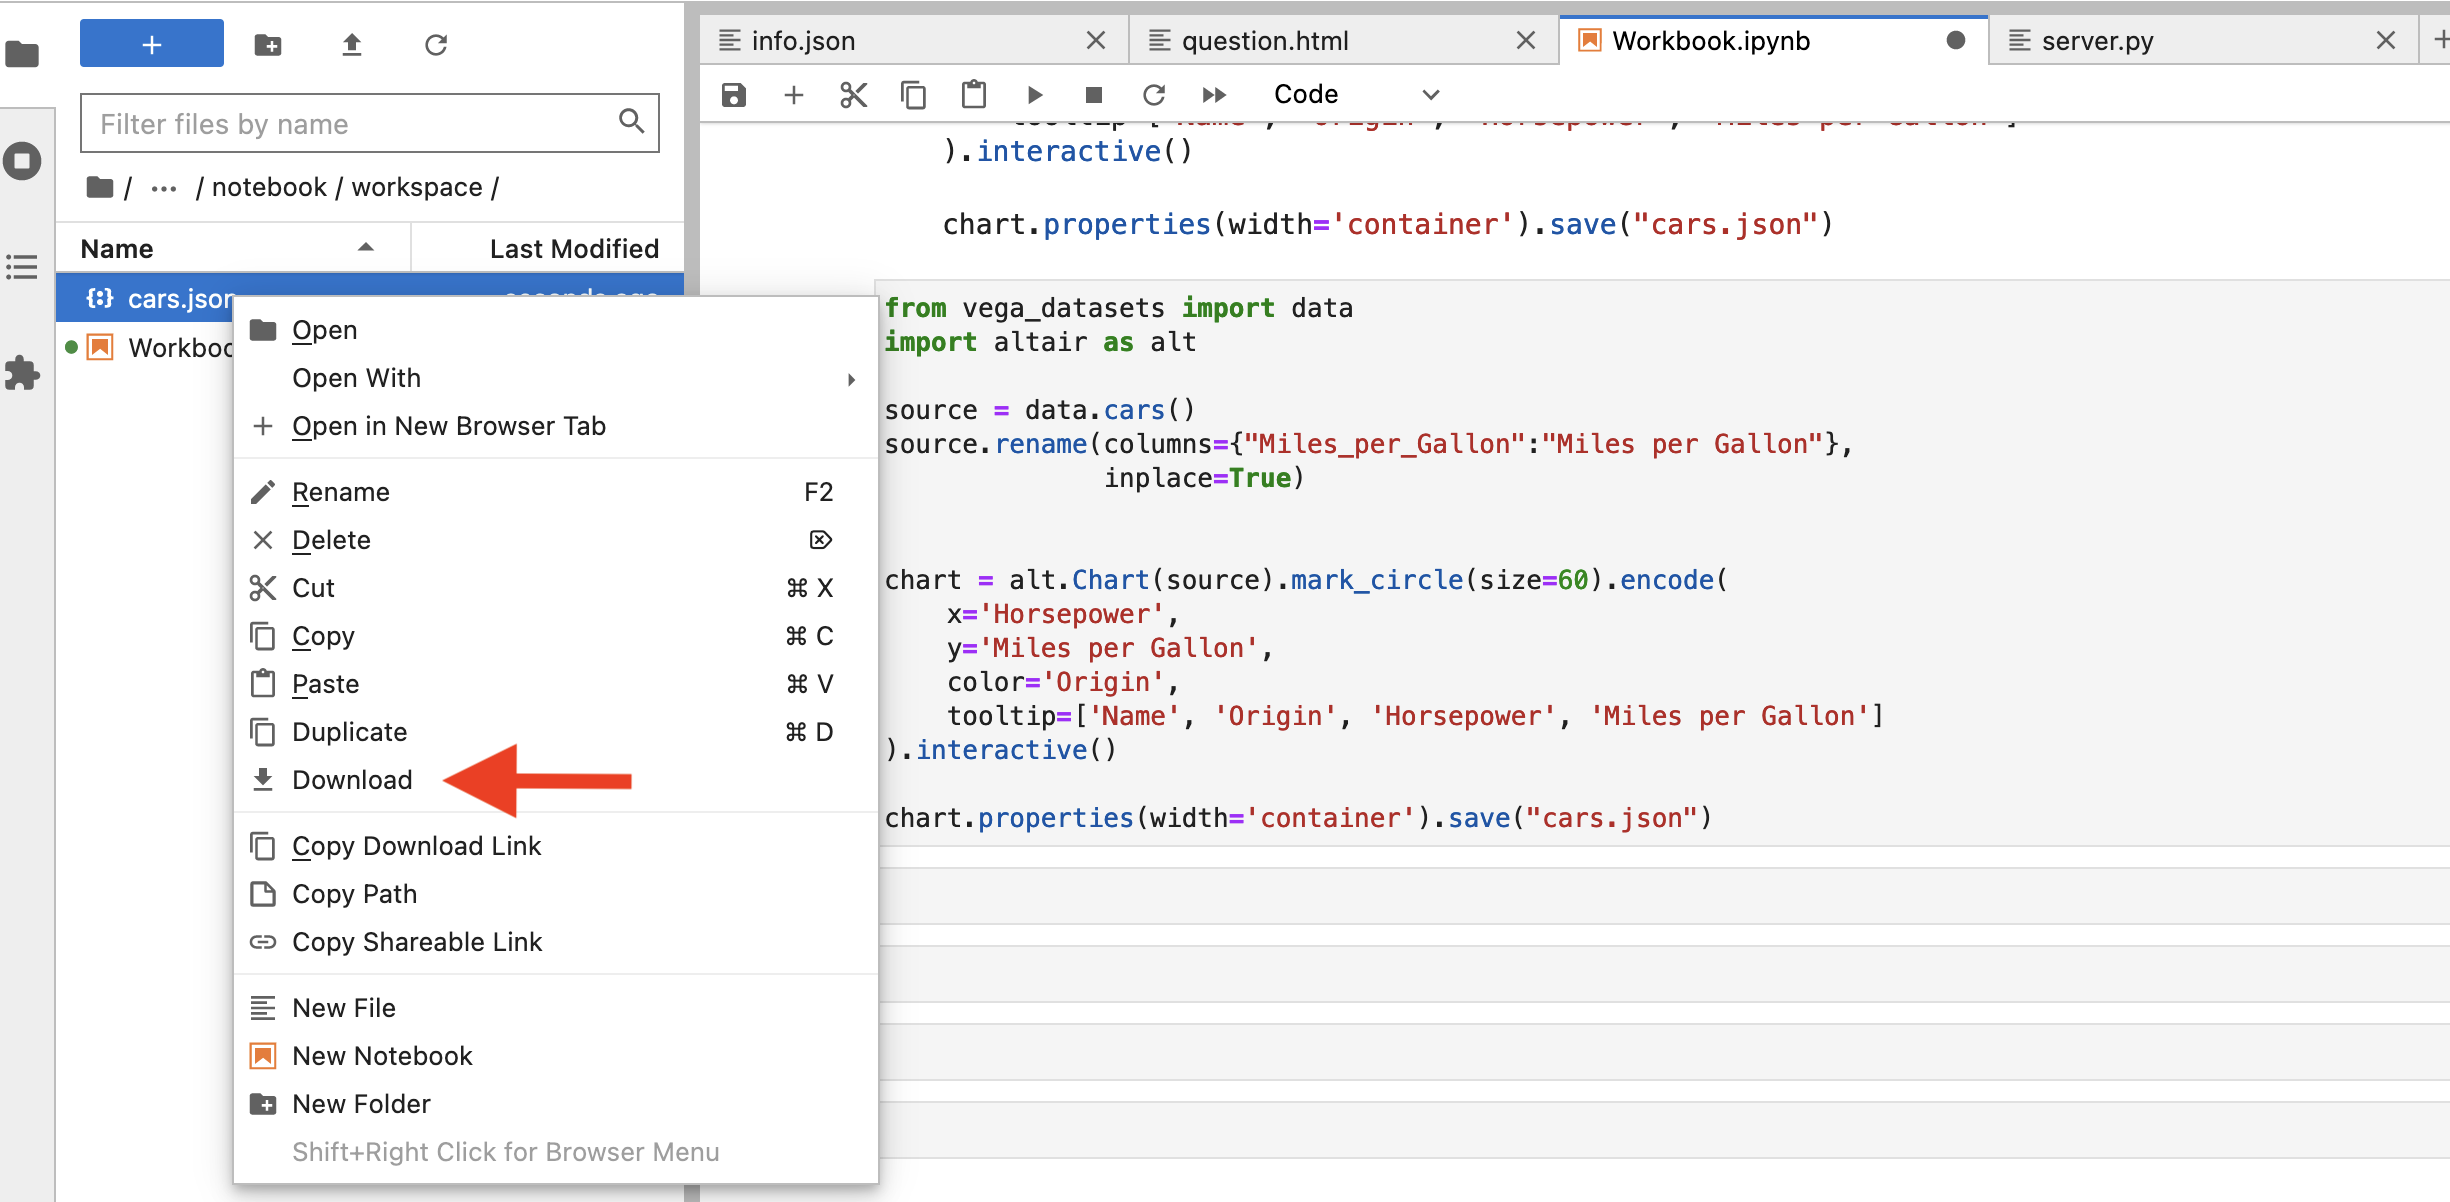

In [5]:
%matplotlib notebook
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import ipywidgets as widget
import bqplot
import altair as alt

In [6]:
df = pd.read_csv('OnlineNewsPopularity.csv')
dfsample =df.sample(n=2000, random_state=42)  # Set a random_state for reproducibility
dfsample

url   timedelta  \
32340  http://mashable.com/2014/09/08/safest-cabbies-...       121.0   
10480   http://mashable.com/2013/07/25/3d-printed-rifle/       532.0   
15370  http://mashable.com/2013/10/30/digital-dinosau...       435.0   
31592  http://mashable.com/2014/08/27/homer-simpson-i...       134.0   
198    http://mashable.com/2013/01/10/creepy-robotic-...       728.0   
...                                                  ...         ...   
457    http://mashable.com/2013/01/15/facebook-graph-...       723.0   
31460  http://mashable.com/2014/08/25/startup-best-ke...       135.0   
6169     http://mashable.com/2013/04/30/spring-thoughts/       618.0   
20453  http://mashable.com/2014/02/14/honest-valentin...       328.0   
12093  http://mashable.com/2013/08/26/song-of-the-sum...       500.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
32340             12.0             1015.0          0.422018   
10480              9.0              503.0          0.569697   
15370              9.0              232.0          0.646018   
31592             12.0              171.0          0.722892   
198               11.0              286.0          0.652632   
...                ...                ...               ...   
457                8.0              408.0          0.487685   
31460             10.0              508.0          0.535070   
6169              10.0              164.0          0.527607   
20453             10.0              143.0          0.567376   
12093              8.0             1920.0          0.267647   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
32340                1.0                   0.545031        10.0   
10480                1.0                   0.737542         9.0   
15370                1.0                   0.748428        12.0   
31592                1.0                   0.867925         9.0   
198                  1.0                   0.800000         5.0   
...                  ...                        ...         ...   
457                  1.0                   0.633621         6.0   
31460                1.0                   0.719178         8.0   
6169                 1.0                   0.564103        25.0   
20453                1.0                   0.581633         3.0   
12093                1.0                   0.343697        56.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
32340              6.0       33.0  ...                0.100000   
10480              0.0        1.0  ...                0.136364   
15370              3.0        4.0  ...                0.375000   
31592              5.0        0.0  ...                0.500000   
198                2.0        0.0  ...                0.100000   
...                ...        ...  ...                     ...   
457                4.0        1.0  ...                0.033333   
31460              7.0        9.0  ...                0.050000   
6169              14.0        0.0  ...                0.100000   
20453              3.0        7.0  ...                0.500000   
12093              2.0       56.0  ...                0.100000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
32340                     0.8               -0.160714                   -0.50   
10480                     1.0               -0.157500                   -0.25   
15370                     0.5               -0.427500                   -1.00   
31592                     0.5               -0.216667                   -0.25   
198                       0.6               -0.251786                   -0.50   
...                       ...                     ...                     ...   
457                       1.0               -0.200000                   -0.20   
31460                     1.0               -0.481597                   -0.70   
6169                      0.8               -0.116667                   -0.20   
20453                  

In [7]:
# removing leading whitespace
dfsample.columns = dfsample.columns.str.strip()
# zoom domain initial
initial_x_domain = [0, 20] 
# colors hex
dark_blue_color = '#08306b'  
dark_red_color = '#67000d'   
# zoom
zoom = alt.selection_interval(bind='scales', encodings=['x'])
# scatter plot
scatter_plot_positive = alt.Chart(dfsample).mark_circle().encode(
    x=alt.X('num_imgs:Q', title='Number of Images', scale=alt.Scale(domain=initial_x_domain)),
    y=alt.Y('rate_positive_words:Q', title='Rate of Positive Words'),
    color=alt.Color(
        'shares:Q',
        scale=alt.Scale(
            domain=[dfsample['shares'].min(), dfsample['shares'].max()],
            type='log',  # Set the scale type to logarithmic
            range=[dark_blue_color, 'white', dark_red_color]
        ),
        title='Number of Shares (Logarithmic Scale)',
    ),
    tooltip=['num_imgs:Q', 'rate_positive_words:Q', 'shares:Q', 'total_num_char:Q'],
    opacity=alt.condition(zoom, alt.value(1), alt.value(0.7))
).properties(
    width=400,
    height=300,
    title='Rate of positive words and number of images colored by the number of shares'
).add_selection(zoom)


scatter_plot_positive.interactive()


/home/jovyan/.local/lib/python3.8/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

In [8]:
# scatter plot
scatter_plot_negative = alt.Chart(dfsample).mark_circle().encode(
    x=alt.X('num_imgs:Q', title='Number of Images', scale=alt.Scale(domain=initial_x_domain)),
    y=alt.Y('rate_negative_words:Q', title='Rate of Negative Words'),
    color=alt.Color(
        'shares:Q',
        scale=alt.Scale(
            domain=[dfsample['shares'].min(), dfsample['shares'].max()],
            type='log',
            range=[dark_blue_color, 'white', dark_red_color]
        ),
        title='Number of Shares (Logarithmic Scale)',
    ),
    tooltip=['num_imgs:Q', 'rate_negative_words:Q', 'shares:Q', 'total_num_char:Q'],
    opacity=alt.condition(zoom, alt.value(1), alt.value(0.7))
).properties(
    width=400,
    height=300,
    title='Rate of positive words and number of images colored by the number of shares'
).add_selection(zoom)

scatter_plot_negative.interactive()



alt.Chart(...)

In [9]:

# if on workspace:
myJekyllDir = './' # save in same folder as notebook
scatter_plot_negative.save(myJekyllDir + 'scatter_plot_negative.json')

In [10]:

# if on workspace:
myJekyllDir = './' # save in same folder as notebook
scatter_plot_positive.save(myJekyllDir + 'scatter_plot_positive.json')